In [1]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [100]:
# Путь до тренировочного датасета
train_dir = "D:\\python\\guicore-alpha\\gui-core-alpha-70-30\\training"
# Путь до датасета валидации
val_dir = "D:\\python\\guicore-alpha\\gui-core-alpha-70-30\\validation"
# Размеры изображения
img_width, img_height = 100, 100
# Размер тензора (размеры изображения + количество цветов)
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 55
# Размер мини-выборки
batch_size = 10
# Количество изображений для обучения
nb_train_samples = 232
# Количество изображений для проверки
nb_validation_samples = 98

In [101]:
# Определение модели (стек слоёв)
model = Sequential()
# Добавление слоёв свёртки
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Добавление остальных слоёв и функций активации
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(6))
model.add(Activation('sigmoid'))

In [102]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
activation_48 (Activation)   (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_49 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 21, 21, 64)       

In [103]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [104]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [105]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 232 images belonging to 6 classes.


In [106]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 98 images belonging to 6 classes.


In [107]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/55
23/23 [==============================] - 2s 79ms/step - loss: 1.7799 - accuracy: 0.2477 - val_loss: 1.6948 - val_accuracy: 0.2000
Epoch 2/55
23/23 [==============================] - 2s 80ms/step - loss: 1.6244 - accuracy: 0.2748 - val_loss: 1.6073 - val_accuracy: 0.2667
Epoch 3/55
23/23 [==============================] - 2s 79ms/step - loss: 1.5654 - accuracy: 0.3108 - val_loss: 1.5692 - val_accuracy: 0.3111
Epoch 4/55
23/23 [==============================] - 2s 78ms/step - loss: 1.4466 - accuracy: 0.3919 - val_loss: 1.3939 - val_accuracy: 0.4222
Epoch 5/55
23/23 [==============================] - 2s 74ms/step - loss: 1.3239 - accuracy: 0.5180 - val_loss: 1.3437 - val_accuracy: 0.4889
Epoch 6/55
23/23 [==============================] - 2s 71ms/step - loss: 1.3010 - accuracy: 0.4640 - val_loss: 1.2785 - val_accuracy: 0.5556
Epoch 7/55
23/23 [==============================] - 2s 74ms/step - loss: 1.1583 - accuracy: 0.5541 - val_loss: 1.1307 - val_accuracy: 0.5444
Epoch 8/55
23

In [114]:
test_dir = "D:\\python\\guicore-alpha\\gui-core-alpha-70-30\\testing"

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical')

Found 20 images belonging to 6 classes.


In [117]:
nb_test_samples = 20
scores = model.evaluate(test_generator)

20/20 [==============================] - 0s 5ms/step - loss: 9.5015 - accuracy: 0.3000


In [99]:
scores[1]

0.30000001192092896

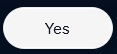

In [71]:
from IPython.display import Image
Image(img_path, width=100, height=100)